# Basic text classification

## 참고 : https://www.tensorflow.org/tutorials/keras/text_classification

### [2022년 6월10일 ~ 6월17일]

# 영화 리뷰를 사용한 텍스트 분류

해당 예시에서는 영화 리뷰(후기) 텍스트를 가져와서 이 후기는  "긍정" (positive) 또는 "부정" (negative)로 분류 해볼꺼에요.

이 예제는 이진(binary, 두개로 분류) 즉 예측을 둘중 하나의 값으로 분류하는 문제입니다.  예) 긍정 / 부정, 사람이다 / 아니다, 등등 두개의 값으로 많이 사용되는 분류방법입니다.

해당 예시에서는 tf.keras 모듈을 사용해서 해볼려고 합니다!

그러기 위해서 일단 필요한 모듈을 설치 및 불러와 봐요~


## 필요 모듈 설치 및 불러오기

### 해당 예시에서는 tensorflow  2.8.0 버전을 사용할것입니다.

#### 아래 불러오기 함수가 실행이 안되면 아래 pip 코드 실행하기


In [9]:
# !pip install tensorflow=="2.8.0" 


In [10]:
# 필요 모듈 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.8.0


In [13]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

## IMDB 데이터셋 다운로드

IMDB 데이터셋은 텐서플로우에서 쉽게 불러와 사용할 수 있도록 미리 전처리 된 형태에서 제공하고 있어요.

어떤 전처리를 해두었을까요?

- string에서 숫자로 변환
    - 우리가 보통 생각하기에 리뷰 데이터는 "와 이 영화 진짜 개꿀잼" 이런식으로 string 형식이겠죠. 하지만, 우리가 사용할 모델은 이런 string 형식이 input으로 들어오면 이해하지 못해요, 왜냐하면 모델은 "숫자"를 받아 프로세스 하기 때문이죠!

- 숫자로 변환? 근데 어떻게??
    - 주어진 string 형식의 정보를 변환해 모델에 넣어주는 방식은 여러가지가 있어요! 해당 예시에서 우리가 변환하는 방식은 간단해요!
        - 특정 단어가 유일한 숫자값으로 mapping 되어있는 어휘사전으로 각 string을 숫자로 변화했어요!
        - 조금 더 풀어서 얘기하면.. 일단 이번에 분석하고자하는 모든 데이터에 존재하는 모든 unique 단어를 찾아서 각각 다른 숫자를 지정해서 dictionary로 만들어주면 되요!
             
             {'I': 100,  'tsukino': 52006,  'nunnery': 52007,  'love': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, ... }
 
        - 위와 같은 dictionary가 만들어지고, "I love spiders" 를 string -> 숫자로 변환한다면   100,16816,16115    이런식으로 바꿔서 데이터를 사용할 수 있겠죠?







IMDB 데이터셋은 텐서플로와 함께 제공됩니다. 리뷰(단어의 시퀀스(sequence))는 미리 전처리해서 정수 시퀀스로 변환되어 있습니다. 각 정수는 어휘 사전에 있는 특정 단어를 의미합니다.

다음 코드는 IMDB 데이터셋을 컴퓨터에 다운로드합니다(또는 이전에 다운로드 받았다면 캐시된 복사본을 사용합니다):

In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_data[3])

550

In [4]:
len(test_data[0])

68

매개변수 `num_words=10000`은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택합니다.

데이터 크기를 적당하게 유지하기 위해 드물게 등장하는 단어는 제외하겠습니다.

## 데이터 탐색

이 데이터셋의 샘플은 전처리된 정수 배열입니다.

    - 이 정수는 영화 리뷰에 나오는 단어를 나타냅니다.

레이블(label)은 정수 0 또는 1입니다.

    - 0은 부정적인 리뷰이고 1은 긍정적인 리뷰입니다.

훈련 샘플: 25000, 레이블: 25000


리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어 있습니다. 첫 번째 리뷰를 확인해 보겠습니다:

In [30]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


영화 리뷰들은 길이가 다릅니다. 다음 코드는 첫 번째 리뷰와 두 번째 리뷰에서 단어의 개수를 출력합니다. 신경망의 입력은 길이가 같아야 하기 때문에 나중에 이 문제를 해결하겠습니다.

In [31]:
len(train_data[0]), len(train_data[1])

(218, 189)

### 정수를 단어로 다시 변환하기

정수를 다시 텍스트로 변환하는 방법이 있다면 유용할 것입니다. 여기에서는 정수와 문자열을 매핑한 딕셔너리(dictionary) 객체에 질의하는
 헬퍼(helper) 함수를 만들겠습니다:

In [36]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
len(word_index)


88584

In [38]:
# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

이제 `decode_review` 함수를 사용해 첫 번째 리뷰 텍스트를 출력할 수 있습니다:

In [39]:
decode_review(train_data[0])

"<START> in with i like horrible business chinese charm would killer waited which explosion ? going at fun ? film make like lame character has novel <UNK> a all final sense ? real ? find character nothing <UNK> second perhaps they ? find valuable cover this city an br overall ? horror has i ? should shop was in with ? delightful 00 despite ? with their people is i like horrible an well it br garbage ? with this genre this is i taken that <UNK> ? she sex is and house and after ? ? product bud i final which returned be ? does is i an annoying ? film where if at man it's film sent be ? with is comedy you than some ? in perfect i get <UNK> and ? think plot windows it fun ? <UNK> the lou ? sequence at their like horrible wanted on getting night just the ? <UNK> rich br any other ? couple it someone then he decade more on why ? can't ajay that ? family with for still wanted on final ? such his lindsay that if at you interesting how film any ? family would i an g other is i once ? i boot seen

## 데이터 준비

리뷰-정수 배열-는 신경망에 주입하기 전에 텐서로 변환되어야 합니다. 변환하는 방법에는 몇 가지가 있습니다:

* 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환합니다. 예를 들어 배열 [3, 5]을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있습니다. 그다음 실수 벡터 데이터를 다룰 수 있는 층-Dense 층-을 신경망의 첫 번째 층으로 사용합니다. 이 방법은 `num_words * num_reviews` 크기의 행렬이 필요하기 때문에 메모리를 많이 사용합니다.
* 다른 방법으로는, 정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 `max_length * num_reviews` 크기의 정수 텐서를 만듭니다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있습니다.

이 튜토리얼에서는 두 번째 방식을 사용하겠습니다.

영화 리뷰의 길이가 같아야 하므로 [pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) 함수를 사용해 길이를 맞추겠습니다:

In [40]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

샘플의 길이를 확인해 보겠습니다:

In [41]:
len(train_data[0]), len(train_data[1])

(256, 256)

(패딩된) 첫 번째 리뷰 내용을 확인해 보겠습니다:

In [42]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 모델 구성

신경망은 층(layer)을 쌓아서 만듭니다. 이 구조에서는 두 가지를 결정해야 합니다:

* 모델에서 얼마나 많은 층을 사용할 것인가?
* 각 층에서 얼마나 많은 *은닉 유닛*(hidden unit)을 사용할 것인가?

이 예제의 입력 데이터는 단어 인덱스의 배열입니다. 예측할 레이블은 0 또는 1입니다. 이 문제에 맞는 모델을 구성해 보겠습니다:

In [43]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

2022-06-13 23:07:07.192482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.194300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.217120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.218540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.218974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


ead from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.761811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.762252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:07.763552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 23:07:09.551518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13

층을 순서대로 쌓아 분류기(classifier)를 만듭니다:

1. 첫 번째 층은 `Embedding` 층입니다. 이 층은 정수로 인코딩된 단어를 입력 받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾습니다. 이 벡터는 모델이 훈련되면서 학습됩니다. 이 벡터는 출력 배열에 새로운 차원으로 추가됩니다. 최종 차원은 `(batch, sequence, embedding)`이 됩니다.
2. 그다음 `GlobalAveragePooling1D` 층은 `sequence` 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환합니다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법입니다.
3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(`Dense`)을 거칩니다.
4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층입니다. `sigmoid` 활성화 함수를 사용하여 0과 1 사이의 실수를 출력합니다. 이 값은 확률 또는 신뢰도를 나타냅니다.

### 은닉 유닛

위 모델에는 입력과 출력 사이에 두 개의 중간 또는 "은닉" 층이 있습니다. 출력(유닛 또는 노드, 뉴런)의 개수는 층이 가진 표현 공간(representational space)의 차원이 됩니다. 다른 말로 하면, 내부 표현을 학습할 때 허용되는 네트워크 자유도의 양입니다.

모델에 많은 은닉 유닛(고차원의 표현 공간)과 층이 있다면 네트워크는 더 복잡한 표현을 학습할 수 있습니다. 하지만 네트워크의 계산 비용이 많이 들고 원치않는 패턴을 학습할 수도 있습니다. 이런 표현은 훈련 데이터의 성능을 향상시키지만 테스트 데이터에서는 그렇지 못합니다. 이를 *과대적합*(overfitting)이라고 부릅니다. 나중에 이에 대해 알아 보겠습니다.

### 손실 함수와 옵티마이저

모델이 훈련하려면 손실 함수(loss function)과 옵티마이저(optimizer)가 필요합니다. 이 예제는 이진 분류 문제이고 모델이 확률을 출력하므로(출력층의 유닛이 하나이고 `sigmoid` 활성화 함수를 사용합니다), `binary_crossentropy` 손실 함수를 사용하겠습니다.

다른 손실 함수를 선택할 수 없는 것은 아닙니다. 예를 들어 `mean_squared_error`를 선택할 수 있습니다. 하지만 일반적으로 `binary_crossentropy`가 확률을 다루는데 적합합니다. 이 함수는 확률 분포 간의 거리를 측정합니다. 여기에서는 정답인 타깃 분포와 예측 분포 사이의 거리입니다.

나중에 회귀(regression) 문제(예를 들어 주택 가격을 예측하는 문제)에 대해 살펴 볼 때 평균 제곱 오차(mean squared error) 손실 함수를 어떻게 사용하는지 알아 보겠습니다.

이제 모델이 사용할 옵티마이저와 손실 함수를 설정해 보겠습니다:

In [44]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 검증 세트 만들기

모델을 훈련할 때 모델이 만난 적 없는 데이터에서 정확도를 확인하는 것이 좋습니다. 원본 훈련 데이터에서 10,000개의 샘플을 떼어내어 *검증 세트*(validation set)를 만들겠습니다. (왜 테스트 세트를 사용하지 않을까요? 훈련 데이터만을 사용하여 모델을 개발하고 튜닝하는 것이 목표입니다. 그다음 테스트 세트를 사용해서 딱 한 번만 정확도를 평가합니다).

In [45]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 모델 훈련

이 모델을 512개의 샘플로 이루어진 미니배치(mini-batch)에서 40번의 에포크(epoch) 동안 훈련합니다. `x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻입니다. 훈련하는 동안 10,000개의 검증 세트에서 모델의 손실과 정확도를 모니터링합니다:

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40



 1/30 [>.............................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5312


 7/30 [======>.......................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5421


14/30 [=============>................] - ETA: 0s - loss: 0.6925 - accuracy: 0.5402


21/30 [====================>.........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5368


28/30 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5420


30/30 [==============================] - 1s 18ms/step - loss: 0.6915 - accuracy: 0.5445 - val_loss: 0.6892 - val_accuracy: 0.6186


Epoch 2/40

 1/30 [>.............................] - ETA: 0s - loss: 0.6894 - accuracy: 0.6211


 8/30 [=======>......................] - ETA: 0s - loss: 0.6878 - accuracy: 0.6907


15/30 [==============>...............] - ETA: 0s - loss: 0.6869 - accuracy: 0.7143


22/30 [=====================>........] - ETA: 0s - loss: 0.6859 - accuracy: 0.7108


29/30 [============================>.] - ETA: 0s - loss: 0.6849 - accuracy: 0.7118


30/30 [==============================] - 0s 10ms/step - loss: 0.6848 - accuracy: 0.7121 - val_loss: 0.6803 - val_accuracy: 0.7401


Epoch 3/40

 1/30 [>.............................] - ETA: 0s - loss: 0.6783 - accuracy: 0.7754


 8/30 [=======>......................] - ETA: 0s - loss: 0.6770 - accuracy: 0.7556


15/30 [==============>...............] - ETA: 0s - loss: 0.6754 - accuracy: 0.7484


22/30 [=====================>........] - ETA: 0s - loss: 0.6739 - accuracy: 0.7447


29/30 [============================>.] - ETA: 0s - loss: 0.6715 - accuracy: 0.7485


30/30 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.7485 - val_loss: 0.6637 - val_accuracy: 0.7498


Epoch 4/40



 1/30 [>.............................] - ETA: 0s - loss: 0.6581 - accuracy: 0.7578


 8/30 [=======>......................] - ETA: 0s - loss: 0.6574 - accuracy: 0.7734


15/30 [==============>...............] - ETA: 0s - loss: 0.6554 - accuracy: 0.7707


22/30 [=====================>........] - ETA: 0s - loss: 0.6511 - accuracy: 0.7752


29/30 [============================>.] - ETA: 0s - loss: 0.6479 - accuracy: 0.7742


30/30 [==============================] - 0s 10ms/step - loss: 0.6478 - accuracy: 0.7743 - val_loss: 0.6363 - val_accuracy: 0.7631


Epoch 5/40

 1/30 [>.............................] - ETA: 0s - loss: 0.6326 - accuracy: 0.7930


 8/30 [=======>......................] - ETA: 0s - loss: 0.6268 - accuracy: 0.7783


15/30 [==============>...............] - ETA: 0s - loss: 0.6222 - accuracy: 0.7816


22/30 [=====================>........] - ETA: 0s - loss: 0.6177 - accuracy: 0.7834


29/30 [============================>.] - ETA: 0s - loss: 0.6120 - accuracy: 0.7888


30/30 [==============================] - 0s 11ms/step - loss: 0.6118 - accuracy: 0.7885 - val_loss: 0.5990 - val_accuracy: 0.7859


Epoch 6/40

 1/30 [>.............................] - ETA: 0s - loss: 0.5874 - accuracy: 0.8203


 8/30 [=======>......................] - ETA: 0s - loss: 0.5855 - accuracy: 0.8018


15/30 [==============>...............] - ETA: 0s - loss: 0.5804 - accuracy: 0.8005


22/30 [=====================>........] - ETA: 0s - loss: 0.5743 - accuracy: 0.8044


29/30 [============================>.] - ETA: 0s - loss: 0.5676 - accuracy: 0.8081


30/30 [==============================] - 0s 11ms/step - loss: 0.5671 - accuracy: 0.8086 - val_loss: 0.5554 - val_accuracy: 0.8003


Epoch 7/40

 1/30 [>.............................] - ETA: 0s - loss: 0.5526 - accuracy: 0.8008


 8/30 [=======>......................] - ETA: 0s - loss: 0.5384 - accuracy: 0.8176


14/30 [=============>................] - ETA: 0s - loss: 0.5313 - accuracy: 0.8260


21/30 [====================>.........] - ETA: 0s - loss: 0.5255 - accuracy: 0.8282


28/30 [===========================>..] - ETA: 0s - loss: 0.5196 - accuracy: 0.8292


30/30 [==============================] - 0s 11ms/step - loss: 0.5181 - accuracy: 0.8295 - val_loss: 0.5107 - val_accuracy: 0.8187


Epoch 8/40

 1/30 [>.............................] - ETA: 0s - loss: 0.5081 - accuracy: 0.8262


 8/30 [=======>......................] - ETA: 0s - loss: 0.4885 - accuracy: 0.8354


15/30 [==============>...............] - ETA: 0s - loss: 0.4793 - accuracy: 0.8439


22/30 [=====================>........] - ETA: 0s - loss: 0.4746 - accuracy: 0.8442


29/30 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.8459


30/30 [==============================] - 0s 11ms/step - loss: 0.4694 - accuracy: 0.8459 - val_loss: 0.4699 - val_accuracy: 0.8339


Epoch 9/40

 1/30 [>.............................] - ETA: 0s - loss: 0.4438 - accuracy: 0.8516


 8/30 [=======>......................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8640


15/30 [==============>...............] - ETA: 0s - loss: 0.4343 - accuracy: 0.8611


22/30 [=====================>........] - ETA: 0s - loss: 0.4298 - accuracy: 0.8612


29/30 [============================>.] - ETA: 0s - loss: 0.4256 - accuracy: 0.8627


30/30 [==============================] - 0s 10ms/step - loss: 0.4252 - accuracy: 0.8627 - val_loss: 0.4325 - val_accuracy: 0.8440


Epoch 10/40

 1/30 [>.............................] - ETA: 0s - loss: 0.4024 - accuracy: 0.8652


 8/30 [=======>......................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8708


15/30 [==============>...............] - ETA: 0s - loss: 0.3939 - accuracy: 0.8720


22/30 [=====================>........] - ETA: 0s - loss: 0.3907 - accuracy: 0.8741


28/30 [===========================>..] - ETA: 0s - loss: 0.3876 - accuracy: 0.8741


30/30 [==============================] - 0s 11ms/step - loss: 0.3868 - accuracy: 0.8745 - val_loss: 0.4025 - val_accuracy: 0.8521


Epoch 11/40

 1/30 [>.............................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8789


 7/30 [======>.......................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8834


14/30 [=============>................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8828


21/30 [====================>.........] - ETA: 0s - loss: 0.3576 - accuracy: 0.8826


28/30 [===========================>..] - ETA: 0s - loss: 0.3553 - accuracy: 0.8829


30/30 [==============================] - 0s 11ms/step - loss: 0.3546 - accuracy: 0.8833 - val_loss: 0.3797 - val_accuracy: 0.8579


Epoch 12/40

 1/30 [>.............................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8828


 8/30 [=======>......................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8857


15/30 [==============>...............] - ETA: 0s - loss: 0.3302 - accuracy: 0.8885


22/30 [=====================>........] - ETA: 0s - loss: 0.3298 - accuracy: 0.8887


29/30 [============================>.] - ETA: 0s - loss: 0.3278 - accuracy: 0.8897


30/30 [==============================] - 0s 10ms/step - loss: 0.3277 - accuracy: 0.8899 - val_loss: 0.3591 - val_accuracy: 0.8658


Epoch 13/40

 1/30 [>.............................] - ETA: 0s - loss: 0.3015 - accuracy: 0.9082


 8/30 [=======>......................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8972


15/30 [==============>...............] - ETA: 0s - loss: 0.3098 - accuracy: 0.8984


22/30 [=====================>........] - ETA: 0s - loss: 0.3084 - accuracy: 0.8968


28/30 [===========================>..] - ETA: 0s - loss: 0.3056 - accuracy: 0.8965


30/30 [==============================] - 0s 10ms/step - loss: 0.3049 - accuracy: 0.8968 - val_loss: 0.3446 - val_accuracy: 0.8683


Epoch 14/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2766 - accuracy: 0.9043


 8/30 [=======>......................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8989


15/30 [==============>...............] - ETA: 0s - loss: 0.2905 - accuracy: 0.8997


22/30 [=====================>........] - ETA: 0s - loss: 0.2876 - accuracy: 0.9011


28/30 [===========================>..] - ETA: 0s - loss: 0.2868 - accuracy: 0.9020


30/30 [==============================] - 0s 10ms/step - loss: 0.2862 - accuracy: 0.9019 - val_loss: 0.3316 - val_accuracy: 0.8730


Epoch 15/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2656 - accuracy: 0.9004


 8/30 [=======>......................] - ETA: 0s - loss: 0.2707 - accuracy: 0.9060


15/30 [==============>...............] - ETA: 0s - loss: 0.2710 - accuracy: 0.9083


22/30 [=====================>........] - ETA: 0s - loss: 0.2697 - accuracy: 0.9078


29/30 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9079


30/30 [==============================] - 0s 10ms/step - loss: 0.2688 - accuracy: 0.9076 - val_loss: 0.3219 - val_accuracy: 0.8763


Epoch 16/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2515 - accuracy: 0.9121


 8/30 [=======>......................] - ETA: 0s - loss: 0.2595 - accuracy: 0.9087


15/30 [==============>...............] - ETA: 0s - loss: 0.2546 - accuracy: 0.9126


22/30 [=====================>........] - ETA: 0s - loss: 0.2550 - accuracy: 0.9123


29/30 [============================>.] - ETA: 0s - loss: 0.2532 - accuracy: 0.9129


30/30 [==============================] - 0s 10ms/step - loss: 0.2538 - accuracy: 0.9127 - val_loss: 0.3141 - val_accuracy: 0.8784


Epoch 17/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9238


 8/30 [=======>......................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9075


15/30 [==============>...............] - ETA: 0s - loss: 0.2501 - accuracy: 0.9089


22/30 [=====================>........] - ETA: 0s - loss: 0.2448 - accuracy: 0.9128


28/30 [===========================>..] - ETA: 0s - loss: 0.2416 - accuracy: 0.9152


30/30 [==============================] - 0s 11ms/step - loss: 0.2407 - accuracy: 0.9156 - val_loss: 0.3073 - val_accuracy: 0.8801


Epoch 18/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2519 - accuracy: 0.9316


 8/30 [=======>......................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9258


15/30 [==============>...............] - ETA: 0s - loss: 0.2225 - accuracy: 0.9257


21/30 [====================>.........] - ETA: 0s - loss: 0.2242 - accuracy: 0.9243


28/30 [===========================>..] - ETA: 0s - loss: 0.2293 - accuracy: 0.9207


30/30 [==============================] - 0s 11ms/step - loss: 0.2288 - accuracy: 0.9207 - val_loss: 0.3016 - val_accuracy: 0.8812


Epoch 19/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2091 - accuracy: 0.9316


 8/30 [=======>......................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9204


15/30 [==============>...............] - ETA: 0s - loss: 0.2163 - accuracy: 0.9257


22/30 [=====================>........] - ETA: 0s - loss: 0.2183 - accuracy: 0.9252


28/30 [===========================>..] - ETA: 0s - loss: 0.2172 - accuracy: 0.9258


30/30 [==============================] - 0s 11ms/step - loss: 0.2172 - accuracy: 0.9261 - val_loss: 0.2972 - val_accuracy: 0.8833


Epoch 20/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1970 - accuracy: 0.9258


 8/30 [=======>......................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9280


14/30 [=============>................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9293


20/30 [===================>..........] - ETA: 0s - loss: 0.2081 - accuracy: 0.9285


27/30 [==========================>...] - ETA: 0s - loss: 0.2064 - accuracy: 0.9298


30/30 [==============================] - 0s 11ms/step - loss: 0.2067 - accuracy: 0.9289 - val_loss: 0.2940 - val_accuracy: 0.8824


Epoch 21/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9551


 7/30 [======>.......................] - ETA: 0s - loss: 0.1870 - accuracy: 0.9406


13/30 [============>.................] - ETA: 0s - loss: 0.1910 - accuracy: 0.9370


20/30 [===================>..........] - ETA: 0s - loss: 0.1954 - accuracy: 0.9336


26/30 [=========================>....] - ETA: 0s - loss: 0.1977 - accuracy: 0.9325


30/30 [==============================] - 0s 11ms/step - loss: 0.1976 - accuracy: 0.9330 - val_loss: 0.2911 - val_accuracy: 0.8836


Epoch 22/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9336


 7/30 [======>.......................] - ETA: 0s - loss: 0.1878 - accuracy: 0.9378


14/30 [=============>................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9371


21/30 [====================>.........] - ETA: 0s - loss: 0.1885 - accuracy: 0.9369


27/30 [==========================>...] - ETA: 0s - loss: 0.1889 - accuracy: 0.9374


30/30 [==============================] - 0s 11ms/step - loss: 0.1885 - accuracy: 0.9369 - val_loss: 0.2895 - val_accuracy: 0.8844


Epoch 23/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9219


 8/30 [=======>......................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9346


15/30 [==============>...............] - ETA: 0s - loss: 0.1804 - accuracy: 0.9391


21/30 [====================>.........] - ETA: 0s - loss: 0.1800 - accuracy: 0.9399


28/30 [===========================>..] - ETA: 0s - loss: 0.1812 - accuracy: 0.9399


30/30 [==============================] - 0s 11ms/step - loss: 0.1805 - accuracy: 0.9402 - val_loss: 0.2879 - val_accuracy: 0.8842


Epoch 24/40

 1/30 [>.............................] - ETA: 0s - loss: 0.2129 - accuracy: 0.9238


 7/30 [======>.......................] - ETA: 0s - loss: 0.1874 - accuracy: 0.9378


13/30 [============>.................] - ETA: 0s - loss: 0.1792 - accuracy: 0.9419


20/30 [===================>..........] - ETA: 0s - loss: 0.1786 - accuracy: 0.9410


27/30 [==========================>...] - ETA: 0s - loss: 0.1737 - accuracy: 0.9435


30/30 [==============================] - 0s 11ms/step - loss: 0.1723 - accuracy: 0.9441 - val_loss: 0.2877 - val_accuracy: 0.8844


Epoch 25/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9375


 7/30 [======>.......................] - ETA: 0s - loss: 0.1646 - accuracy: 0.9484


14/30 [=============>................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9473


21/30 [====================>.........] - ETA: 0s - loss: 0.1683 - accuracy: 0.9455


28/30 [===========================>..] - ETA: 0s - loss: 0.1643 - accuracy: 0.9478


30/30 [==============================] - 0s 10ms/step - loss: 0.1650 - accuracy: 0.9475 - val_loss: 0.2857 - val_accuracy: 0.8855


Epoch 26/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1403 - accuracy: 0.9609


 8/30 [=======>......................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9495


15/30 [==============>...............] - ETA: 0s - loss: 0.1552 - accuracy: 0.9500


22/30 [=====================>........] - ETA: 0s - loss: 0.1571 - accuracy: 0.9495


29/30 [============================>.] - ETA: 0s - loss: 0.1580 - accuracy: 0.9500


30/30 [==============================] - 0s 10ms/step - loss: 0.1584 - accuracy: 0.9497 - val_loss: 0.2855 - val_accuracy: 0.8860


Epoch 27/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1367 - accuracy: 0.9453


 8/30 [=======>......................] - ETA: 0s - loss: 0.1492 - accuracy: 0.9514


15/30 [==============>...............] - ETA: 0s - loss: 0.1512 - accuracy: 0.9513


22/30 [=====================>........] - ETA: 0s - loss: 0.1518 - accuracy: 0.9513


29/30 [============================>.] - ETA: 0s - loss: 0.1518 - accuracy: 0.9517


30/30 [==============================] - 0s 10ms/step - loss: 0.1519 - accuracy: 0.9518 - val_loss: 0.2871 - val_accuracy: 0.8854


Epoch 28/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1388 - accuracy: 0.9551


 8/30 [=======>......................] - ETA: 0s - loss: 0.1411 - accuracy: 0.9592


15/30 [==============>...............] - ETA: 0s - loss: 0.1416 - accuracy: 0.9578


22/30 [=====================>........] - ETA: 0s - loss: 0.1438 - accuracy: 0.9561


29/30 [============================>.] - ETA: 0s - loss: 0.1460 - accuracy: 0.9543


30/30 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.9543 - val_loss: 0.2867 - val_accuracy: 0.8864


Epoch 29/40



 1/30 [>.............................] - ETA: 0s - loss: 0.1717 - accuracy: 0.9375


 8/30 [=======>......................] - ETA: 0s - loss: 0.1389 - accuracy: 0.9600


14/30 [=============>................] - ETA: 0s - loss: 0.1363 - accuracy: 0.9591


21/30 [====================>.........] - ETA: 0s - loss: 0.1386 - accuracy: 0.9578


28/30 [===========================>..] - ETA: 0s - loss: 0.1390 - accuracy: 0.9583


30/30 [==============================] - 0s 10ms/step - loss: 0.1396 - accuracy: 0.9575 - val_loss: 0.2875 - val_accuracy: 0.8856


Epoch 30/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1324 - accuracy: 0.9492


 8/30 [=======>......................] - ETA: 0s - loss: 0.1378 - accuracy: 0.9570


15/30 [==============>...............] - ETA: 0s - loss: 0.1370 - accuracy: 0.9570


22/30 [=====================>........] - ETA: 0s - loss: 0.1384 - accuracy: 0.9572


29/30 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9596


30/30 [==============================] - 0s 10ms/step - loss: 0.1343 - accuracy: 0.9596 - val_loss: 0.2883 - val_accuracy: 0.8855


Epoch 31/40



 1/30 [>.............................] - ETA: 0s - loss: 0.1347 - accuracy: 0.9727


 8/30 [=======>......................] - ETA: 0s - loss: 0.1275 - accuracy: 0.9668


15/30 [==============>...............] - ETA: 0s - loss: 0.1264 - accuracy: 0.9659


22/30 [=====================>........] - ETA: 0s - loss: 0.1283 - accuracy: 0.9645


29/30 [============================>.] - ETA: 0s - loss: 0.1287 - accuracy: 0.9628


30/30 [==============================] - 0s 10ms/step - loss: 0.1286 - accuracy: 0.9629 - val_loss: 0.2902 - val_accuracy: 0.8862


Epoch 32/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1343 - accuracy: 0.9629


 8/30 [=======>......................] - ETA: 0s - loss: 0.1270 - accuracy: 0.9656


15/30 [==============>...............] - ETA: 0s - loss: 0.1254 - accuracy: 0.9660


22/30 [=====================>........] - ETA: 0s - loss: 0.1230 - accuracy: 0.9655


29/30 [============================>.] - ETA: 0s - loss: 0.1237 - accuracy: 0.9657


30/30 [==============================] - 0s 11ms/step - loss: 0.1233 - accuracy: 0.9656 - val_loss: 0.2920 - val_accuracy: 0.8854


Epoch 33/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1290 - accuracy: 0.9492


 8/30 [=======>......................] - ETA: 0s - loss: 0.1201 - accuracy: 0.9607


14/30 [=============>................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9632


21/30 [====================>.........] - ETA: 0s - loss: 0.1216 - accuracy: 0.9649


28/30 [===========================>..] - ETA: 0s - loss: 0.1195 - accuracy: 0.9658


30/30 [==============================] - 0s 11ms/step - loss: 0.1189 - accuracy: 0.9659 - val_loss: 0.2935 - val_accuracy: 0.8854


Epoch 34/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1132 - accuracy: 0.9727


 8/30 [=======>......................] - ETA: 0s - loss: 0.1110 - accuracy: 0.9719


15/30 [==============>...............] - ETA: 0s - loss: 0.1111 - accuracy: 0.9704


22/30 [=====================>........] - ETA: 0s - loss: 0.1126 - accuracy: 0.9695


29/30 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9692


30/30 [==============================] - 0s 11ms/step - loss: 0.1138 - accuracy: 0.9688 - val_loss: 0.2968 - val_accuracy: 0.8843


Epoch 35/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1129 - accuracy: 0.9707


 8/30 [=======>......................] - ETA: 0s - loss: 0.1037 - accuracy: 0.9719


15/30 [==============>...............] - ETA: 0s - loss: 0.1114 - accuracy: 0.9684


22/30 [=====================>........] - ETA: 0s - loss: 0.1106 - accuracy: 0.9698


28/30 [===========================>..] - ETA: 0s - loss: 0.1097 - accuracy: 0.9697


30/30 [==============================] - 0s 11ms/step - loss: 0.1098 - accuracy: 0.9696 - val_loss: 0.2996 - val_accuracy: 0.8842


Epoch 36/40

 1/30 [>.............................] - ETA: 0s - loss: 0.1047 - accuracy: 0.9707


 8/30 [=======>......................] - ETA: 0s - loss: 0.1089 - accuracy: 0.9683


15/30 [==============>...............] - ETA: 0s - loss: 0.1070 - accuracy: 0.9693


22/30 [=====================>........] - ETA: 0s - loss: 0.1043 - accuracy: 0.9709


29/30 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 0.9700


30/30 [==============================] - 0s 11ms/step - loss: 0.1062 - accuracy: 0.9701 - val_loss: 0.3017 - val_accuracy: 0.8842


Epoch 37/40

 1/30 [>.............................] - ETA: 0s - loss: 0.0987 - accuracy: 0.9727


 8/30 [=======>......................] - ETA: 0s - loss: 0.1003 - accuracy: 0.9741


14/30 [=============>................] - ETA: 0s - loss: 0.1008 - accuracy: 0.9731


21/30 [====================>.........] - ETA: 0s - loss: 0.0986 - accuracy: 0.9741


28/30 [===========================>..] - ETA: 0s - loss: 0.1022 - accuracy: 0.9720


30/30 [==============================] - 0s 11ms/step - loss: 0.1014 - accuracy: 0.9724 - val_loss: 0.3078 - val_accuracy: 0.8830


Epoch 38/40

 1/30 [>.............................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9766


 7/30 [======>.......................] - ETA: 0s - loss: 0.0998 - accuracy: 0.9729


14/30 [=============>................] - ETA: 0s - loss: 0.0967 - accuracy: 0.9741


21/30 [====================>.........] - ETA: 0s - loss: 0.0983 - accuracy: 0.9740


28/30 [===========================>..] - ETA: 0s - loss: 0.0974 - accuracy: 0.9738


30/30 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 0.9735 - val_loss: 0.3076 - val_accuracy: 0.8825


Epoch 39/40

 1/30 [>.............................] - ETA: 0s - loss: 0.0873 - accuracy: 0.9746


 8/30 [=======>......................] - ETA: 0s - loss: 0.0994 - accuracy: 0.9712


15/30 [==============>...............] - ETA: 0s - loss: 0.1009 - accuracy: 0.9716


22/30 [=====================>........] - ETA: 0s - loss: 0.0966 - accuracy: 0.9744


29/30 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9758


30/30 [==============================] - 0s 10ms/step - loss: 0.0937 - accuracy: 0.9758 - val_loss: 0.3110 - val_accuracy: 0.8836


Epoch 40/40

 1/30 [>.............................] - ETA: 0s - loss: 0.0884 - accuracy: 0.9746


 8/30 [=======>......................] - ETA: 0s - loss: 0.0895 - accuracy: 0.9766


14/30 [=============>................] - ETA: 0s - loss: 0.0911 - accuracy: 0.9760


21/30 [====================>.........] - ETA: 0s - loss: 0.0906 - accuracy: 0.9765


28/30 [===========================>..] - ETA: 0s - loss: 0.0896 - accuracy: 0.9773


30/30 [==============================] - 0s 10ms/step - loss: 0.0901 - accuracy: 0.9773 - val_loss: 0.3138 - val_accuracy: 0.8817


## 모델 평가

모델의 성능을 확인해 보죠. 두 개의 값이 반환됩니다. 손실(오차를 나타내는 숫자이므로 낮을수록 좋습니다)과 정확도입니다.

In [17]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3335 - accuracy: 0.8722


[0.3335219919681549, 0.8722400069236755]


이 예제는 매우 단순한 방식을 사용하므로 87% 정도의 정확도를 달성했습니다. 고급 방법을 사용한 모델은 95%에 가까운 정확도를 얻습니다.

## 정확도와 손실 그래프 그리기

`model.fit()`은 `History` 객체를 반환합니다. 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리(dictionary)가 들어 있습니다:

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

네 개의 항목이 있습니다. 훈련과 검증 단계에서 모니터링하는 지표들입니다. 훈련 손실과 검증 손실을 그래프로 그려 보고, 훈련 정확도와 검증 정확도도 그래프로 그려서 비교해 보겠습니다:

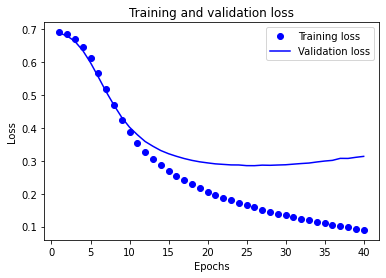

In [19]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

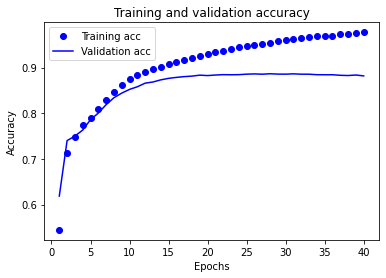

In [20]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 그래프에서 점선은 훈련 손실과 훈련 정확도를 나타냅니다. 실선은 검증 손실과 검증 정확도입니다.

훈련 손실은 에포크마다 *감소*하고 훈련 정확도는 *증가*한다는 것을 주목하세요. 경사 하강법 최적화를 사용할 때 볼 수 있는 현상입니다. 매 반복마다 최적화 대상의 값을 최소화합니다.

하지만 검증 손실과 검증 정확도에서는 그렇지 못합니다. 약 20번째 에포크 이후가 최적점인 것 같습니다. 이는 과대적합 때문입니다. 이전에 본 적 없는 데이터보다 훈련 데이터에서 더 잘 동작합니다. 이 지점부터는 모델이 과도하게 최적화되어 테스트 데이터에서 *일반화*되기 어려운 훈련 데이터의 특정 표현을 학습합니다.

여기에서는 과대적합을 막기 위해 단순히 20번째 에포크 근처에서 훈련을 멈출 수 있습니다. 나중에 콜백(callback)을 사용하여 자동으로 이렇게 하는 방법을 배워 보겠습니다.